3. Build the Image classification model by dividing the model into following 4 stages:
a. Loading and preprocessing the image data
b. Defining the model’s architecture
c. Training the model
d. Estimating the model’s performance

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Input, Conv2D, MaxPool2D, Flatten
from keras.utils import to_categorical
from keras.utils import plot_model

##### a. Loading and preprocessing the image data

In [5]:
from keras.datasets import cifar10

In [6]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [7]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
x_test.shape

(10000, 32, 32, 3)

In [9]:
import matplotlib.pyplot as plt

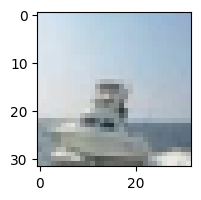

In [13]:
plt.figure(figsize=(2,2))
plt.imshow(x_train[100])

In [15]:
x_train[100].shape

(32, 32, 3)

In [16]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [17]:
labels = ['airplane','automobile','bird','cat',
          'deer','dog','frog','horse','ship','truck']

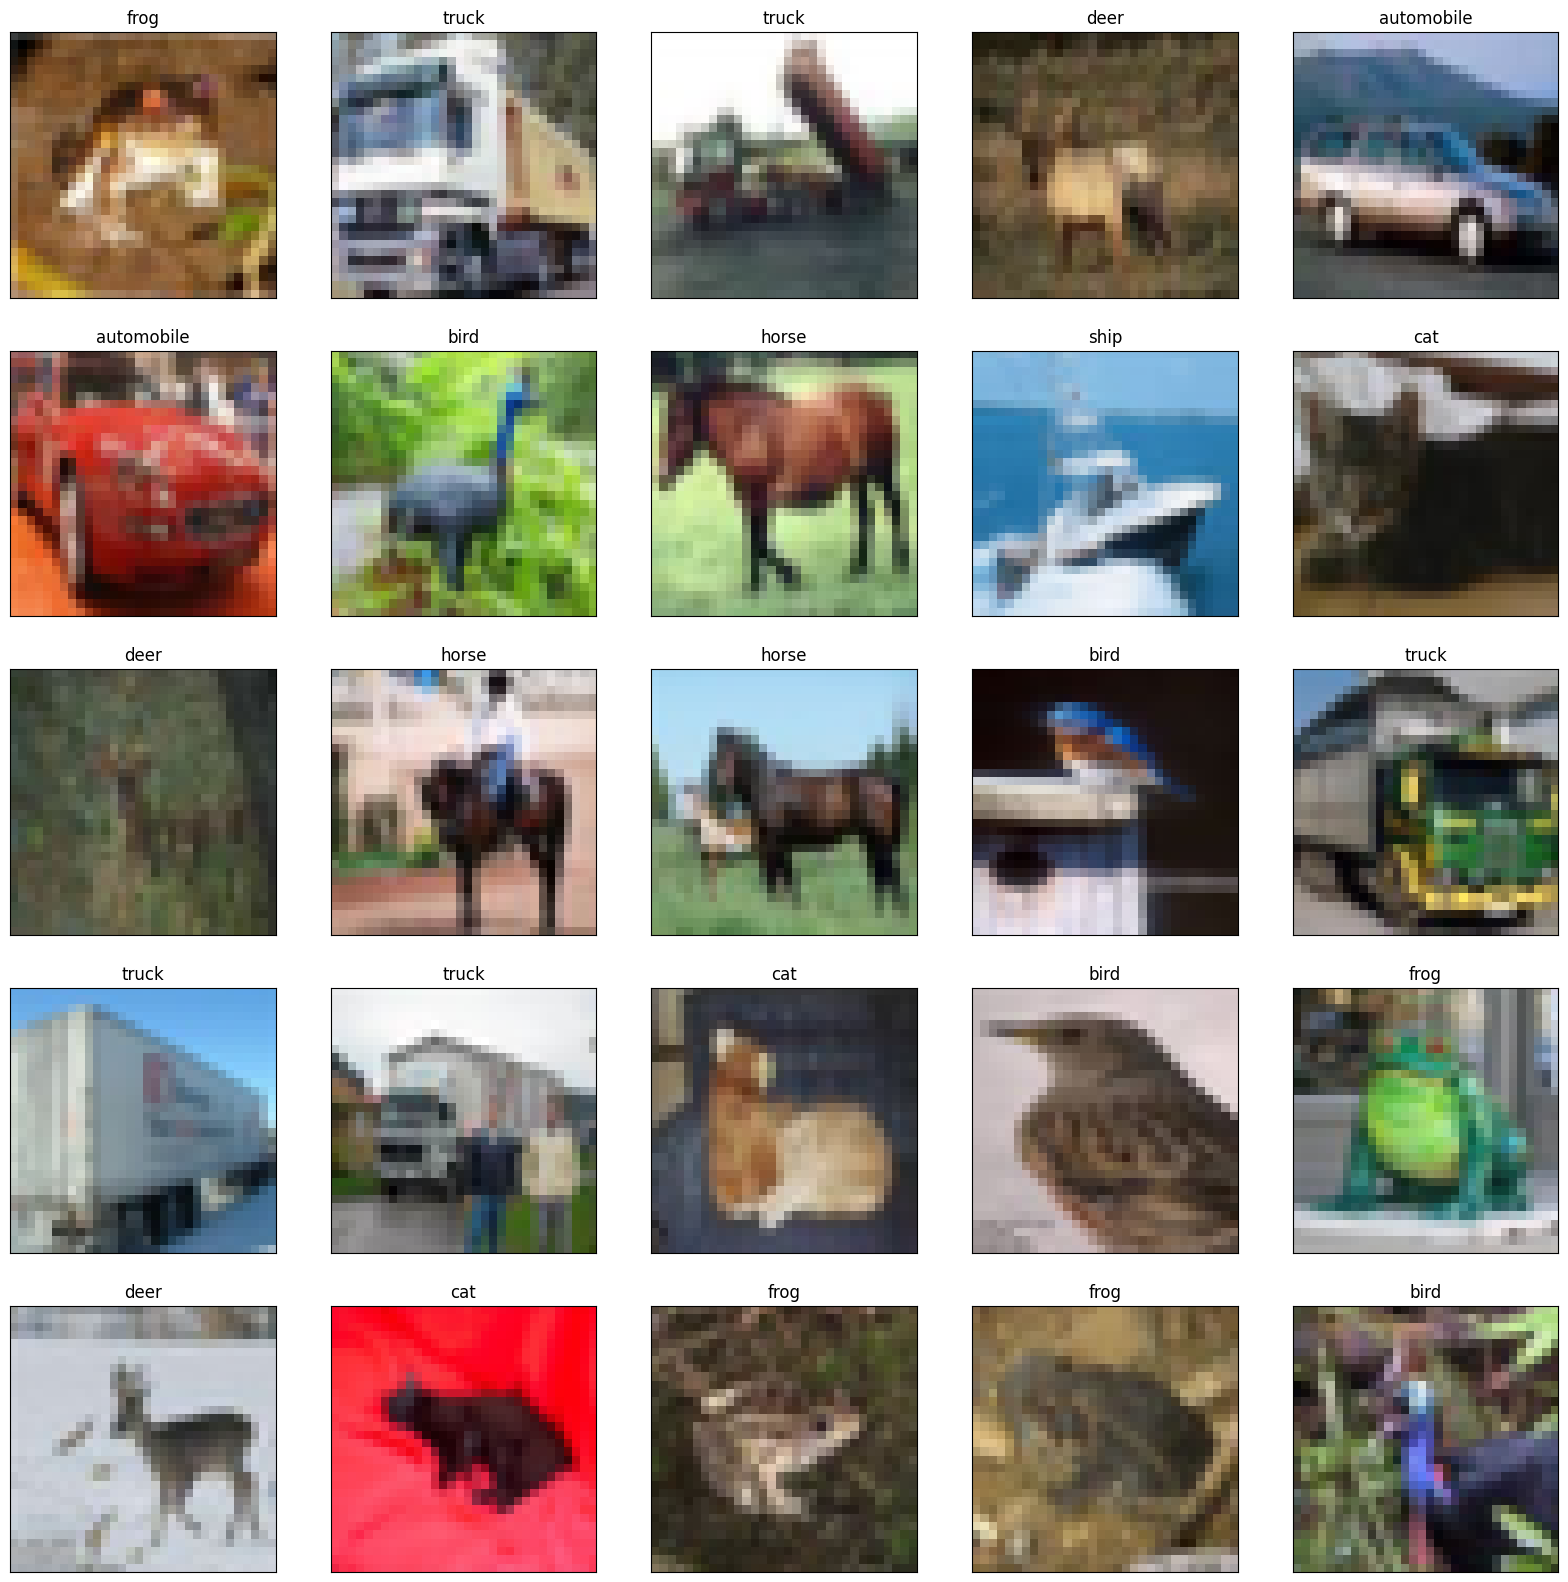

In [29]:
plt.figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(labels[y_train[i][0]])
    plt.imshow(x_train[i])

In [31]:
y_train.shape

(50000, 1)

In [34]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [33]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [35]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [36]:
# convert the y in one-hot encoded form
y_train_new = to_categorical(y_train)
y_test_new = to_categorical(y_test)

In [37]:
y_train_new.shape

(50000, 10)

In [38]:
y_train_new

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

##### b. Defining the model’s architecture

In [47]:
model = Sequential()

model.add(Input((32,32,3)))
model.add(Conv2D(32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(16, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [48]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 157,338 (614.60 KB)

 Trainable params: 157,338 (614.60 KB)

 Non-trainable params: 0 (0.00 B)

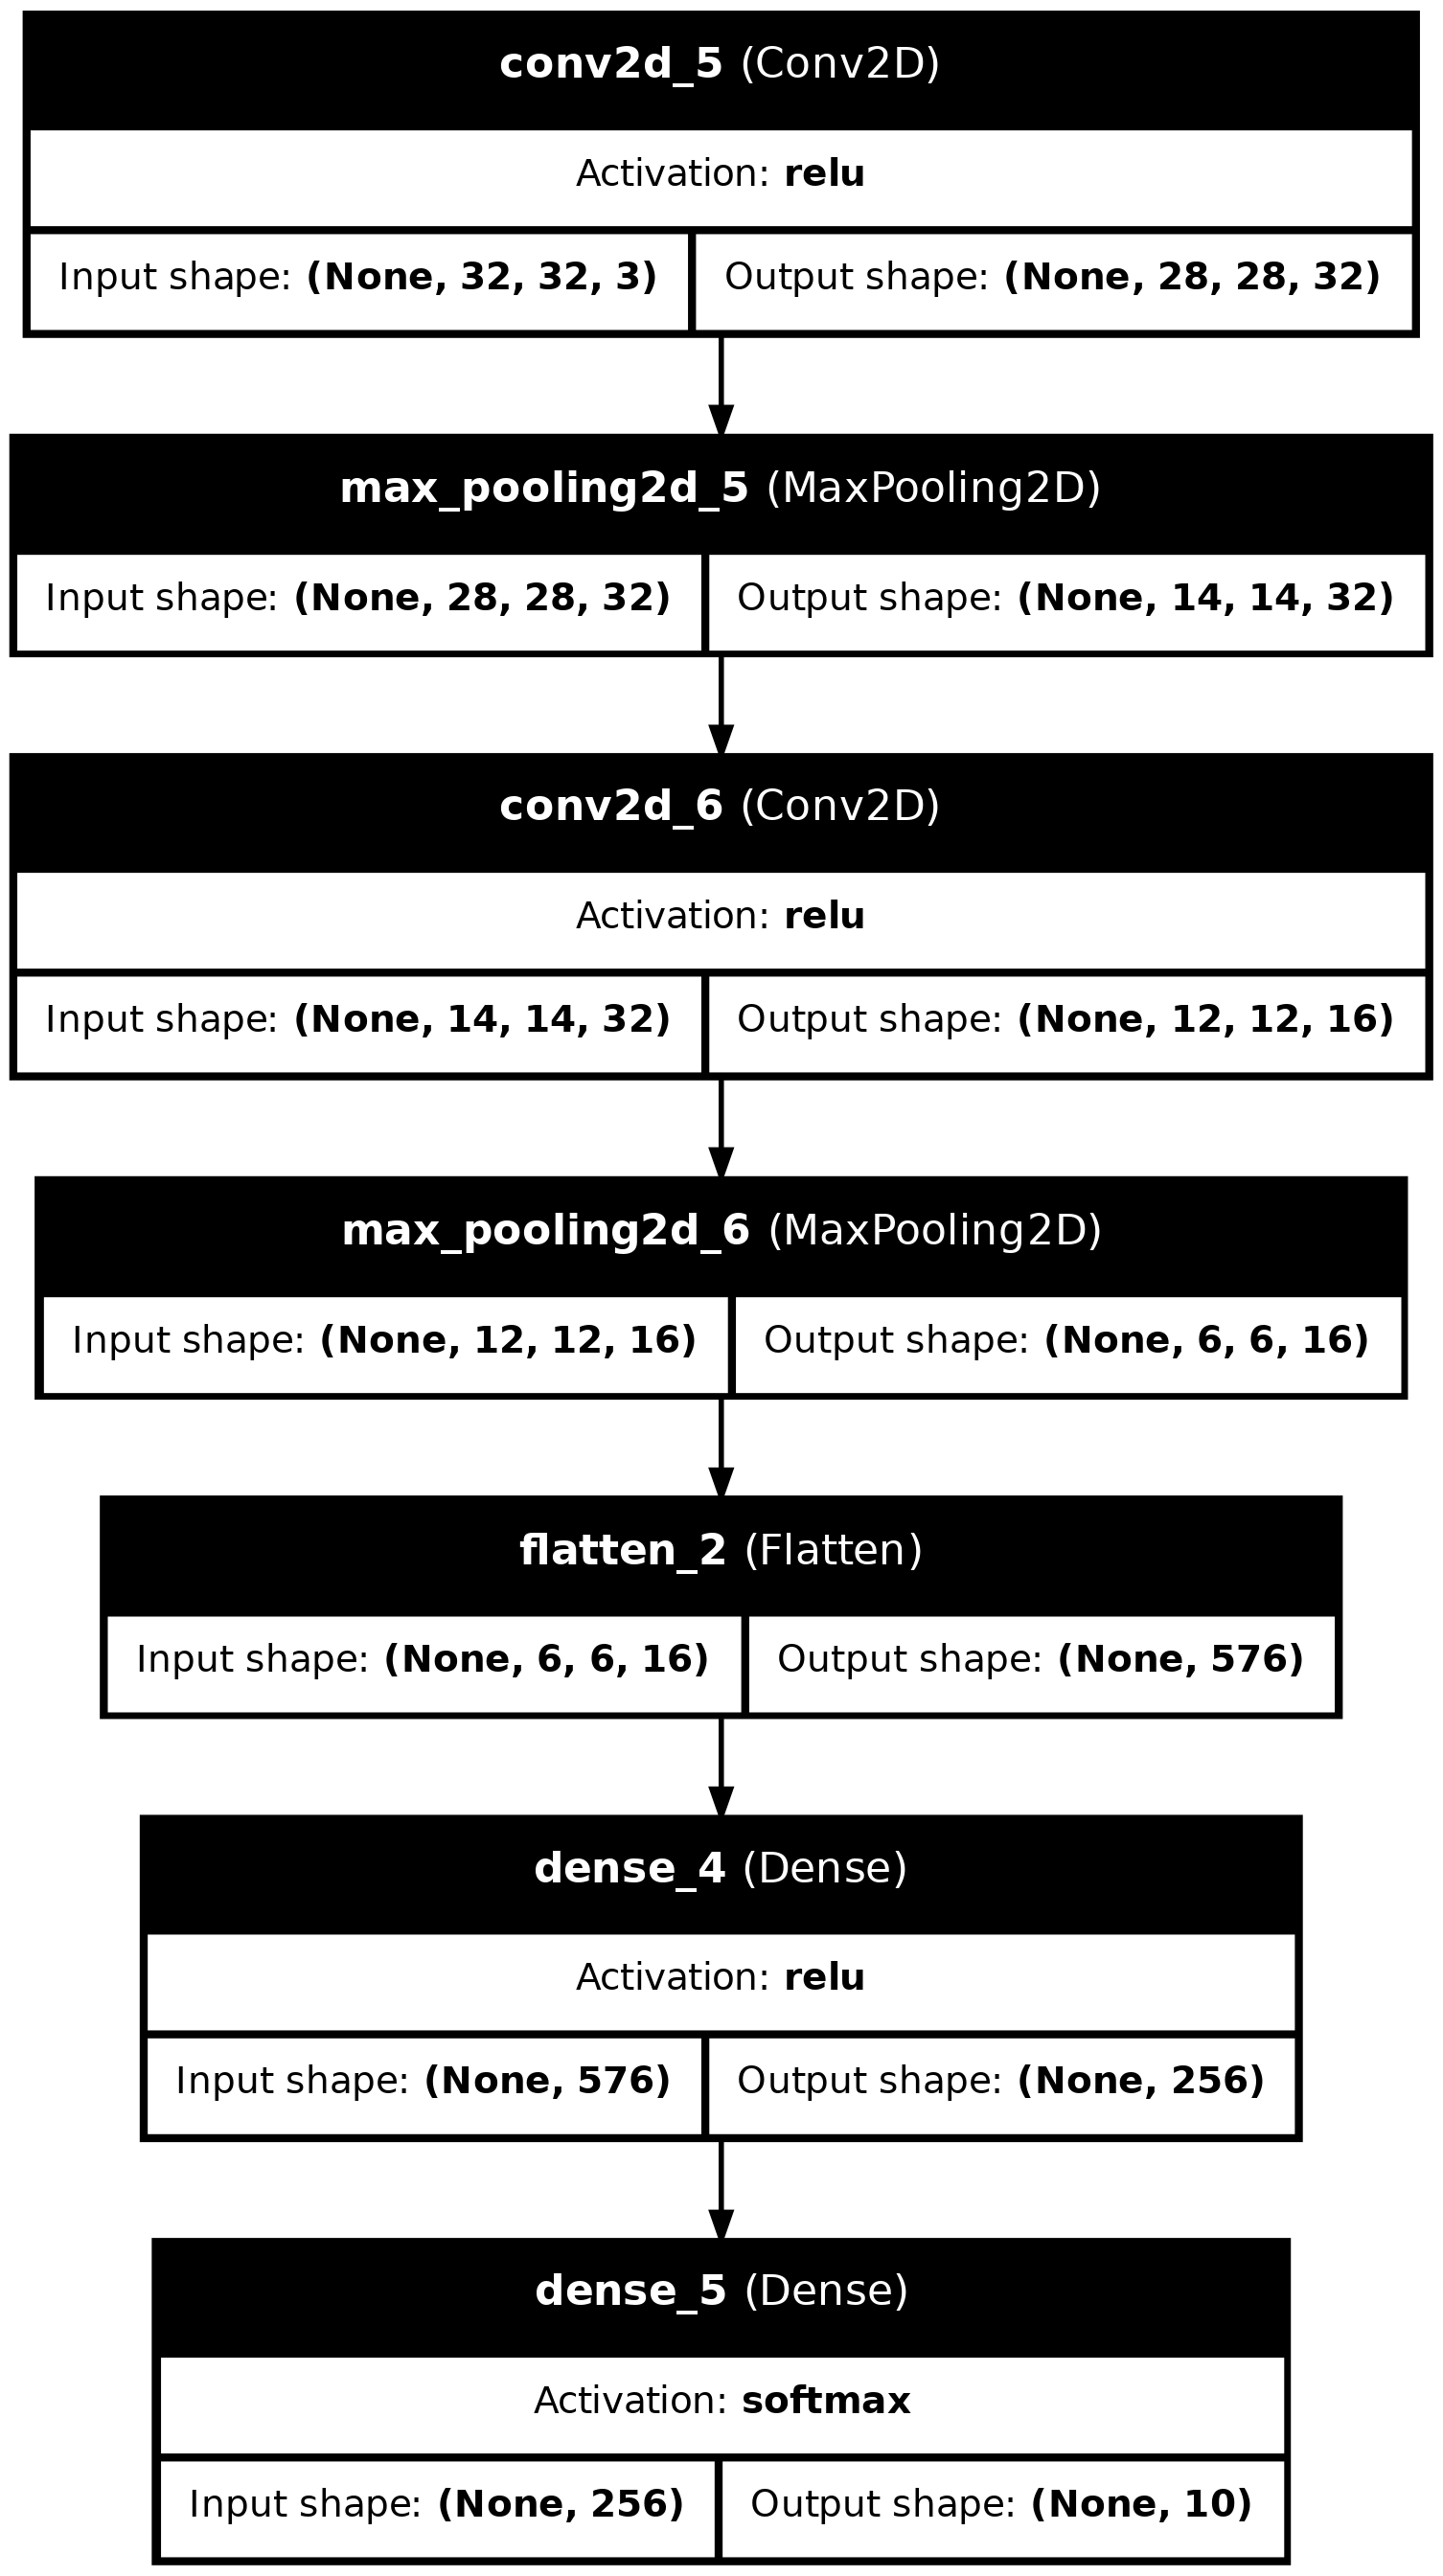

In [49]:
plot_model(model, show_layer_activations=True, show_layer_names=True,
          show_shapes=True)

##### c. Training the model

In [56]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])

In [57]:
model.fit(x_train, y_train_new, epochs=10, batch_size=10)

Epoch 1/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 133s 25ms/step - accuracy: 0.1042 - loss: 2.6086
Epoch 2/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 61s 12ms/step - accuracy: 0.1026 - loss: 2.3039
Epoch 3/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 37s 7ms/step - accuracy: 0.0989 - loss: 2.3034
Epoch 4/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 36s 7ms/step - accuracy: 0.0979 - loss: 2.3032
Epoch 5/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 37s 7ms/step - accuracy: 0.1009 - loss: 2.3029
Epoch 6/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 35s 7ms/step - accuracy: 0.0995 - loss: 2.3029
Epoch 7/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 39s 8ms/step - accuracy: 0.0999 - loss: 2.3028
Epoch 8/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 39s 8ms/step - accuracy: 0.0969 - loss: 2.3029
Epoch 9/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 36s 7ms/step - accuracy: 0.0994 - loss: 2.3029
Epoch 10/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 34s 7ms/step - accuracy: 0.0977 - loss: 2.3028


##### d. Estimating the model’s performance

In [60]:
model.evaluate(x_test, y_test_new, batch_size = 1)

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.0997 - loss: 2.3027


[2.302732229232788, 0.10000000149011612]